# Markov Chain Monte-Carlo Experiment

## Imports

In [185]:
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

## Data Distribution

In [186]:
mu = 0
sigma = 5
num_population = 100000
population = np.random.normal(mu, sigma, num_population)

Text(0.5, 1.0, 'Data Distribution')

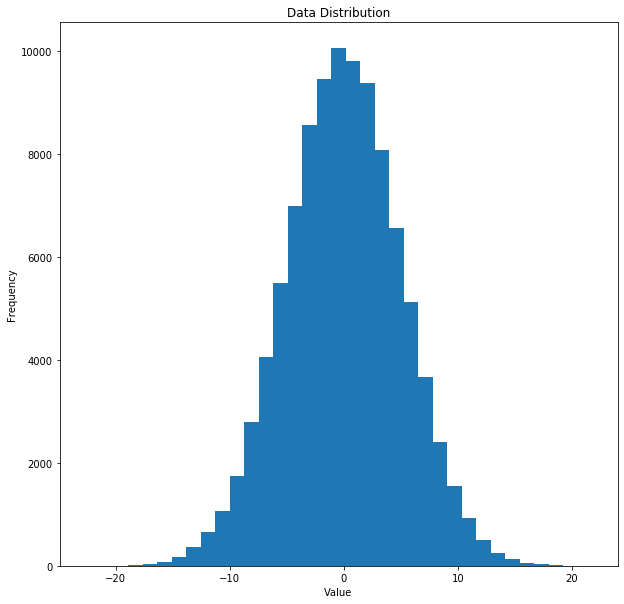

In [187]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(population,bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Data Distribution")

## Sample

In [188]:
num_samples = 1000
observations = population[np.random.randint(0, num_population, num_samples)]

Text(0.5, 1.0, 'Sample Distribution')

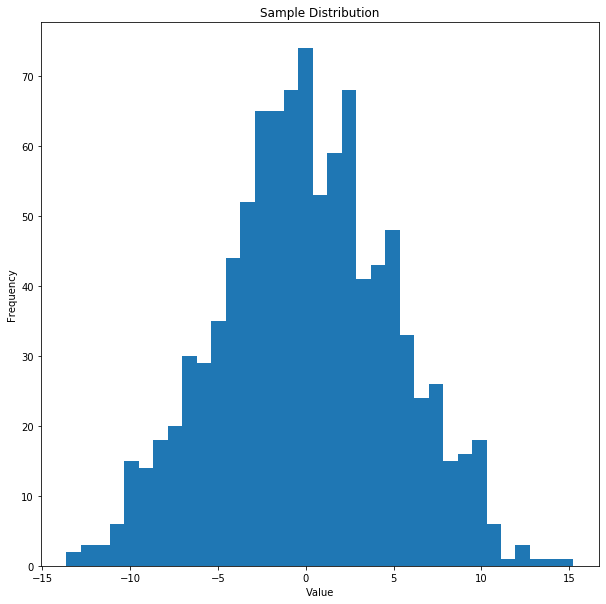

In [189]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation,bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Sample Distribution")

## Metropolis Algorithm for estimating $\mu$

In [190]:
def prior(mu):
    return 1

def likelihood(mu, d):
    return np.sum(1/(sigma*np.sqrt(2*np.pi)) * np.exp((-1/2)*np.power(((d-mu)/sigma),2)))


def proposal_dist(mu):
    num_samples = 1
    return np.random.normal(mu,sigma,(num_samples,))[0]


def metropolis(observation, iterations):
    mu_obs=observation.mean()
    init_mu = -1
    state = init_mu
    posterior_samples = []
    rejected = []
    for i in range(iterations):
        candidate = proposal_dist(state)
        candidate_unnormalized_posterior = likelihood(candidate, observation)
        state_unnormalized_posterior = likelihood(state, observation)
        acceptance_ratio = candidate_unnormalized_posterior/state_unnormalized_posterior
        u = np.random.rand()
        if u <= acceptance_ratio:
            state = candidate
            posterior_samples.append(state)
        else:
            rejected.append(candidate)## Metropolis Algorithm for estimating $\mu$
            state = state
    return posterior_samples, rejected

## MCMC Estimate of Posterior $\mathbb{P}[\mu | \mathcal{D}]$ and $\mathbb{E}[\mu]$

In [191]:
posterior_samples, rejected = metropolis(observations, 100000)

Text(0.5, 1.0, 'Sampled Posterior')

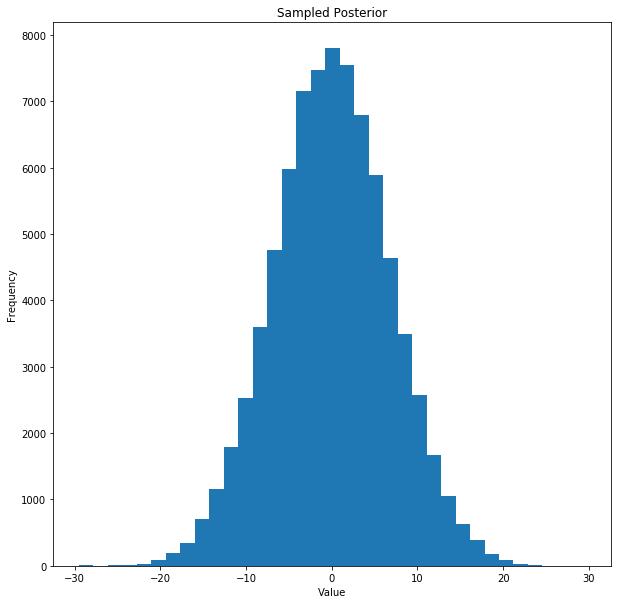

In [192]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(posterior_samples,bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Sampled Posterior")

In [193]:
np.mean(posterior_samples)

-0.01664484355312519

## Metropolis-Hastings Algorithm for estimating $\sigma$

In [194]:
mu = 0

In [195]:
def prior(sigma):
    if sigma <= 0:
        return 0
    else:
        return 1

def likelihood(sigma, d):
    #print(mu)
    return np.sum(1/(sigma*np.sqrt(2*np.pi)) * np.exp((-1/2)*np.power(((d-mu)/sigma),2)))


def proposal_dist(sigma):
    num_samples = 1
    return np.random.normal(sigma, 0.5, (num_samples,))[0]

def proposal_dist_cond(d, sigma):
    return np.sum(1/(0.5*np.sqrt(2*np.pi)) * np.exp((-1/2)*np.power(((d-sigma)/0.5),2)))


def metropolis_hastings(observation, iterations):
    mu_obs=observation.mean()
    init_sigma = 3
    state = init_sigma
    posterior_samples = []
    rejected = []
    for i in range(iterations):
        candidate = proposal_dist(state)
        candidate_unnormalized_posterior = likelihood(candidate, observation)
        state_unnormalized_posterior = likelihood(state, observation)
        acceptance_ratio = min(1,((candidate_unnormalized_posterior/state_unnormalized_posterior)
        *((proposal_dist_cond(state, candidate)/proposal_dist_cond(candidate, state)))))
        u = np.random.rand()
        if u <= acceptance_ratio:
            state = candidate
            posterior_samples.append(state)
        else:
            rejected.append(candidate)## Metropolis Algorithm for estimating $\mu$
            state = state
    return posterior_samples, rejected

## MCMC Estimate of Posterior $\mathbb{P}[\sigma | \mathcal{D}]$ and $\mathbb{E}[\sigma]$

In [196]:
posterior_samples, rejected = metropolis_hastings(observations, 100000)

Text(0.5, 1.0, 'Sampled Posterior')

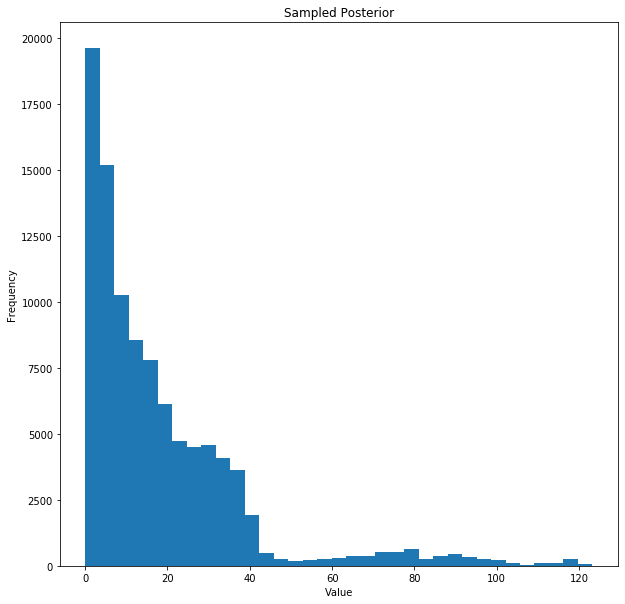

In [197]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(posterior_samples,bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Sampled Posterior")

In [198]:
np.mean(posterior_samples)

18.11858487604205

## Data Distribution 2

In [205]:
means =(0,2,5)
cov = [[1, 0, 0], [0, 1,0], [0,0,1]]
num_population = 100000
population = np.random.multivariate_normal(means, cov, (num_population,))

In [206]:
population.shape

(100000, 3)

Text(0.5, 1.0, 'Data Distribution')

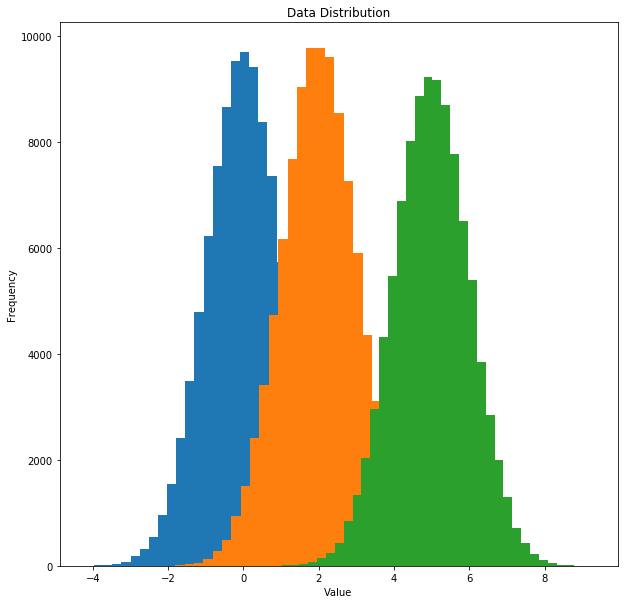

In [210]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(population[:,0],bins=35 ,)
ax.hist(population[:,1],bins=35 ,)
ax.hist(population[:,2],bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Data Distribution")

## Gibbs Sampling for estimating $\mu$